<a href="https://colab.research.google.com/github/poojitha673/DIGIBHEM/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.7070 - accuracy: 0.3700 - val_loss: 1.3641 - val_accuracy: 0.5021
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.3531 - accuracy: 0.5162 - val_loss: 1.1773 - val_accuracy: 0.5815
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.2172 - accuracy: 0.5719 - val_loss: 1.0650 - val_accuracy: 0.6266
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1214 - accuracy: 0.6098 - val_loss: 1.0183 - val_accuracy: 0.6463
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0467 - accuracy: 0.6386 - val_loss: 0.9998 - val_accuracy: 0.6536
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9866 - accuracy: 0.6601 - val_loss: 0.9385 - val_accuracy: 0.6697
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9374 - accuracy: 0.6771 - val_loss: 0.8917 -

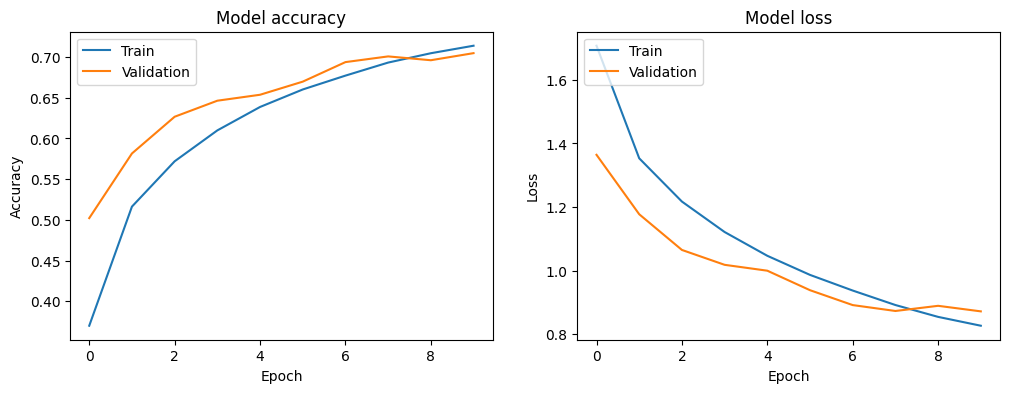

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Print model summary
model.summary()

# Save the model in the new Keras format
model.save('cifar10_model.keras')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
